## Import all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Create dataframe

In [3]:
# Function to create columns in dataframe

def df_construct(fare = 50, rate=-2, year_beg = 2020, year_end = 2066, time_interval = 1):
  df = pd.DataFrame(columns = columns)
  df.iloc[:, 0] = np.arange(year_beg, year_end, time_interval)
  df.iloc[:, 1] = df.iloc[:, 0] - year_beg
  df.iloc[0, 2] = fare*12
  df.iloc[1:, 2] = fare*12*df.iloc[1:, 1]
  df.iloc[0, 3] = df.iloc[0, 2]
  df.iloc[1:,3] = df.iloc[1:,2] * (pow(1+rate/100, df.iloc[1:, 1]))
  return df

In [4]:
# Creating dataframe for Nonrefundable fare for 50 000 CAD insurance

year_beg = 2020
year_end = 2066
years = year_end - year_beg

time_interval = 1
rate = -2
fare_nonref = 84
yearly_paid_nonref = fare_nonref*12
columns = ['year', 'years_passed','total_nonref', 'CI_incl_nonref']

ins_nonref = df_construct(fare_nonref, rate)
ins_nonref.head(2)

,year,years_passed,total_nonref,CI_incl_nonref
0,2020,0,1008,1008
1,2021,1,1008,987.84


In [5]:
# Creating dataframe for refundable fare for 50 000 CAD insurance

fare_ref = 139
yearly_paid_ref = fare_ref*12
yearly_dif = yearly_paid_ref - yearly_paid_nonref

columns = ['year', 'years_passed','total_ref', 'CI_incl_ref']

ins_ref = df_construct(fare_ref)

# I'll merge two dataframes, so I will leave only 2 columns of my new dataframe
ins_ref = ins_ref[['total_ref', 'CI_incl_ref']]
ins_ref.head(2)

,total_ref,CI_incl_ref
0,1668,1668
1,1668,1634.64


In [6]:
# Concatenate both dataframes for analysis

ins = pd.concat([ins_nonref, ins_ref], axis=1)
ins['total_dif'] = ins['total_ref']-ins['total_nonref']

# Save created dataframe to csv

ins.to_csv(r'files/Investment_concatenated.csv', index=False)
ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif
41,2061,41,41328,18051.5,68388,29870.9,27060
42,2062,42,42336,18122,70056,29987.5,27720
43,2063,43,43344,18182.4,71724,30087.5,28380
44,2064,44,44352,18233.1,73392,30171.4,29040
45,2065,45,45360,18274.5,75060,30240,29700


## Adding investment data

In [7]:
### Creating new columns for investment of 5%
ins = pd.read_csv(r'files/Investment_concatenated.csv')

inv_5pct = 0.05

for i in range(years):
    if ins.years_passed[i] == 0:
        ins['start_balance_5pct'] = 0
        ins['interest_5pct'] = ins.start_balance_5pct[i]*inv_5pct       
        ins['end_balance_5pct'] = yearly_dif

    else:
        ins.loc[i, 'start_balance_5pct'] = ins.end_balance_5pct[i-1]
        ins.loc[i, 'interest_5pct'] = ins.start_balance_5pct[i]*inv_5pct
        ins.loc[i, 'end_balance_5pct'] = ins.start_balance_5pct[i] + ins.interest_5pct[i] + yearly_dif

ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct
41,2061,41,41328,18051.508169,68388,29870.948041,27060,84374.243550,4218.712178,89252.955728
42,2062,42,42336,18121.953079,70056,29987.517594,27720,89252.955728,4462.647786,94375.603514
43,2063,43,43344,18182.359589,71724,30087.475986,28380,94375.603514,4718.780176,99754.383690
44,2064,44,44352,18233.101057,73392,30171.441035,29040,99754.383690,4987.719184,105402.102874
45,2065,45,45360,18274.539923,75060,30240.012492,29700,105402.102874,5270.105144,111332.208018


In [8]:
### Creating new columns for investment of 4%

inv_4pct = 0.04

for i in range(years):
    if ins.years_passed[i] == 0:
        ins['start_balance_4pct'] = 0
        ins['interest_4pct'] = ins.start_balance_4pct[i]*inv_4pct       
        ins['end_balance_4pct'] = yearly_dif

    else:
        ins.loc[i, 'start_balance_4pct'] = ins.end_balance_4pct[i-1]
        ins.loc[i, 'interest_4pct'] = ins.start_balance_4pct[i]*inv_4pct
        ins.loc[i, 'end_balance_4pct'] = ins.start_balance_4pct[i] + ins.interest_4pct[i] + yearly_dif
ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct,start_balance_4pct,interest_4pct,end_balance_4pct
41,2061,41,41328,18051.508169,68388,29870.948041,27060,84374.243550,4218.712178,89252.955728,65885.513975,2635.420559,69180.934534
42,2062,42,42336,18121.953079,70056,29987.517594,27720,89252.955728,4462.647786,94375.603514,69180.934534,2767.237381,72608.171916
43,2063,43,43344,18182.359589,71724,30087.475986,28380,94375.603514,4718.780176,99754.383690,72608.171916,2904.326877,76172.498792
44,2064,44,44352,18233.101057,73392,30171.441035,29040,99754.383690,4987.719184,105402.102874,76172.498792,3046.899952,79879.398744
45,2065,45,45360,18274.539923,75060,30240.012492,29700,105402.102874,5270.105144,111332.208018,79879.398744,3195.175950,83734.574694


In [9]:
# Change data type to integer
ins = ins.astype(int)
ins.tail(2)

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct,start_balance_4pct,interest_4pct,end_balance_4pct
44,2064,44,44352,18233,73392,30171,29040,99754,4987,105402,76172,3046,79879
45,2065,45,45360,18274,75060,30240,29700,105402,5270,111332,79879,3195,83734


## Visualisation section

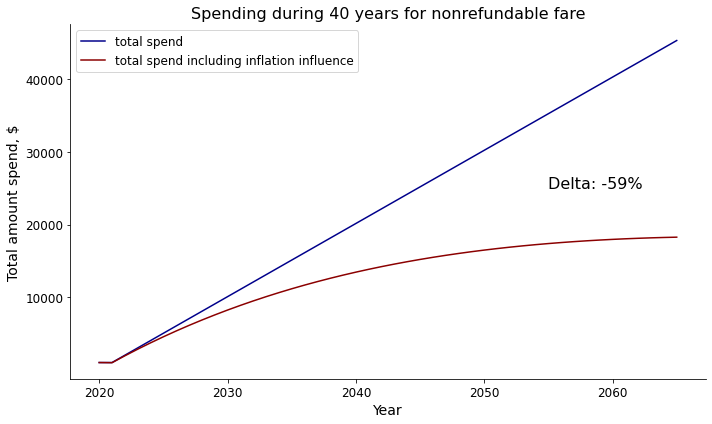

In [10]:
# Visualisation of spending during 40 years with nonrefundable fare and inflation influence

delta = 100*(ins.CI_incl_nonref.max() - ins.total_nonref.max())/ins.total_nonref.max()

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(ins.year, ins.total_nonref, color = 'darkblue', label = 'total spend')
plt.plot(ins.year, ins.CI_incl_nonref, color = 'darkred', label = 'total spend including inflation influence')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total amount spend, $', fontsize = 14)
plt.title('Spending during 40 years for nonrefundable fare', fontsize = 16)
plt.legend(loc='upper left', fontsize = 12)

plt.annotate('Delta: ' + str(int(delta)) + '%', xy = (2055, 25000), xytext = (2055, 25000), fontsize = 16)

plt.yticks([10000, 20000, 30000, 40000], fontsize = 12)
plt.xticks([2020, 2030, 2040, 2050, 2060], fontsize = 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.style.use('ggplot')

plt.tight_layout()
fig.savefig(r'files/total_vs_inflation.jpg')
plt.show()

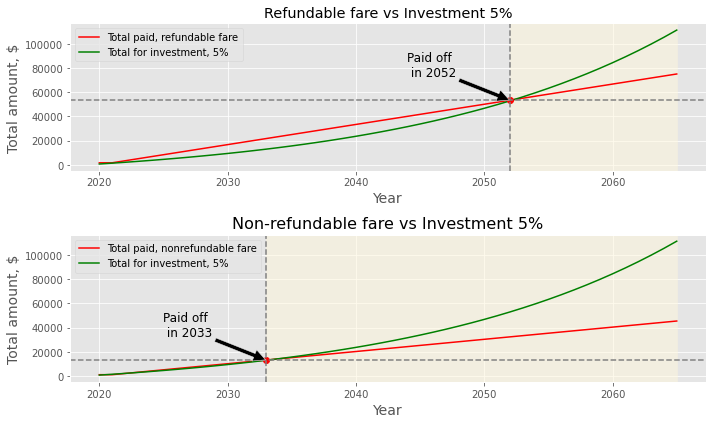

In [11]:
# Plotting chart to discover paid-off time

#REFUNDABLE FARE
# Investment of investment 5% visualisation
fig, ax = plt.subplots(2, 1, sharey = True, figsize=(10,6))
ax[0].plot(ins.year, ins.total_ref,color='red', label = 'Total paid, refundable fare')
ax[0].plot(ins.year, ins.end_balance_5pct, color='green', label = 'Total for investment, 5%')

# Intersection point of paid-off with investment 5%
idx5_ref = np.argwhere(np.diff(np.sign(ins.total_ref - ins.end_balance_5pct))).flatten()
ax[0].plot(ins.year[idx5_ref], ins.total_ref[idx5_ref], 'ro')

# Annotations:
year_ref_5 = int(ins.year[idx5_ref])
amount = int(ins.total_ref[idx5_ref])
ax[0].annotate('Paid off\n in ' + str(year_ref_5), xy = (year_ref_5,amount), xytext = (year_ref_5-8, amount+20000), arrowprops = dict(facecolor='black', shrink=0.01), fontsize = 12)

# Adding lines
ax[0].axhline(amount, color = 'grey', linestyle='--')
ax[0].axvline(year_ref_5, color='grey', linestyle='--')

# Adding Vertical Spans
ax[0].axvspan(year_ref_5, ins.year.max(), alpha=0.5, color='cornsilk')

ax[0].set_xlabel('Year', fontsize = 14)
ax[0].set_ylabel('Total amount, $', fontsize = 14)
ax[0].legend(loc = 'upper left')

ax[0].set_title('Refundable fare vs Investment 5%')


# NONREFUNDABLE FARE
ax[1].plot(ins.year, ins.total_nonref,color='red', label = 'Total paid, nonrefundable fare')
ax[1].plot(ins.year, ins.end_balance_5pct, color='green', label = 'Total for investment, 5%')

# Intersection point of paid-off with investment 5%
idx5_nonref = np.argwhere(np.diff(np.sign(ins.total_nonref - ins.end_balance_5pct))).max().flatten()
ax[1].plot(ins.year[idx5_nonref], ins.total_nonref[idx5_nonref], 'ro')

# Annotations:
year_nonref_5 = int(ins.year[idx5_nonref])
amount = int(ins.total_nonref[idx5_nonref])
ax[1].annotate('Paid off\n in ' + str(year_nonref_5), xy = (year_nonref_5,amount), xytext = (year_nonref_5-8, amount+20000), arrowprops = dict(facecolor='black', shrink=0.01), fontsize = 12)

# Adding lines
ax[1].axhline(amount, color = 'grey', linestyle='--')
ax[1].axvline(year_nonref_5, color='grey', linestyle='--')

# Adding Vertical Spans
ax[1].axvspan(year_nonref_5, ins.year.max(), alpha=0.5, color='cornsilk')

ax[1].set_xlabel('Year', fontsize = 14)
ax[1].set_ylabel('Total amount, $', fontsize = 14)
ax[1].legend(loc = 'upper left')
ax[1].set_title('Non-refundable fare vs Investment 5%', fontsize = 16)

plt.savefig(r"files/Paid_off_time.jpg")
plt.style.use('seaborn-colorblind')
plt.tight_layout()
plt.show()

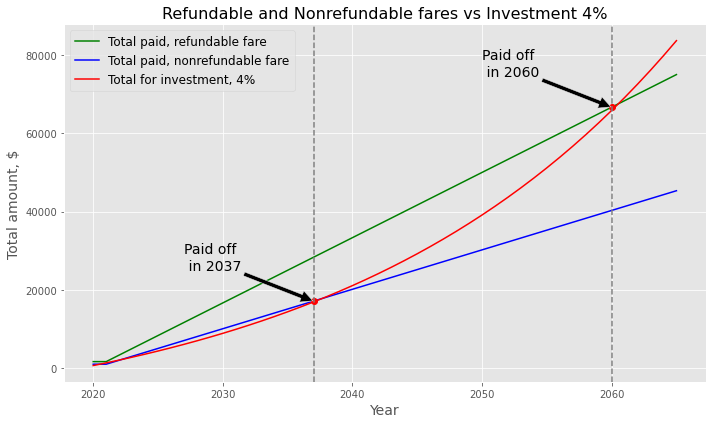

In [12]:
#### Refundable and Nonrefundable fares vs Investment 4%
## Plotting chart to discover paid-off time on one chart

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ins.year, ins.total_ref,color='green', label = 'Total paid, refundable fare')
ax.plot(ins.year, ins.total_nonref,color='blue', label = 'Total paid, nonrefundable fare')
ax.plot(ins.year, ins.end_balance_4pct, color='red', label = 'Total for investment, 4%')

# Intersection point of paid-off for refundable fare with investment 4%
idx4_ref = np.argwhere(np.diff(np.sign(ins.total_ref - ins.end_balance_4pct))).flatten()
ax.plot(ins.year[idx4_ref], ins.total_ref[idx4_ref], 'ro')

# Intersection point of paid-off for nonrefundable fare with investment 4%
idx4_nonref = np.argwhere(np.diff(np.sign(ins.total_nonref - ins.end_balance_4pct))).max().flatten()
ax.plot(ins.year[idx4_nonref], ins.total_nonref[idx4_nonref], 'ro')

# Annotations:
year_ref_4 = int(ins.year[idx4_ref])
amount_ref = int(ins.total_ref[idx4_ref])
ax.annotate('Paid off\n in ' + str(year_ref_4), xy = (year_ref_4,amount_ref), xytext = (year_ref_4-10, amount_ref+8000), arrowprops = dict(facecolor='black', shrink=0.01), fontsize = 14)

year_nonref_4 = int(ins.year[idx4_nonref])
amount_nonref = int(ins.total_nonref[idx4_nonref])
ax.annotate('Paid off\n in ' + str(year_nonref_4), xy = (year_nonref_4,amount_nonref), xytext = (year_nonref_4-10, amount_nonref+8000), arrowprops = dict(facecolor='black', shrink=0.01), fontsize = 14)

# Adding lines
ax.axvline(year_nonref_4, color='grey', linestyle='--')
ax.axvline(year_ref_4, color='grey', linestyle='--')

# Adding Vertical Spans
# ax.axvspan(year, ins.year.max(), alpha=0.5, color='cornsilk')

ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Total amount, $', fontsize = 14)
ax.legend(loc = 'upper left', fontsize = 12)

ax.set_title('Refundable and Nonrefundable fares vs Investment 4%', fontsize = 16)

fig.savefig(r"files/Paid_off_time2.jpg")
plt.tight_layout()

plt.show()

In [13]:
print("Paid-off year with investment 4pct for refundable fare: ", year_ref_4, 
      "\n\nPaid-off year with investment 4pct for nonrefundable fare: ", year_nonref_4, 
      "\n\n_____________________________________________________________________",
      "\n\nPaid-off year with investment 5pct for refundable fare: ", year_ref_5, 
      "\n\nPaid-off year with investment 5pct for nonrefundable fare: ", year_nonref_5)

Paid-off year with investment 4pct for refundable fare:  2060 

Paid-off year with investment 4pct for nonrefundable fare:  2037 

_____________________________________________________________________ 

Paid-off year with investment 5pct for refundable fare:  2052 

Paid-off year with investment 5pct for nonrefundable fare:  2033


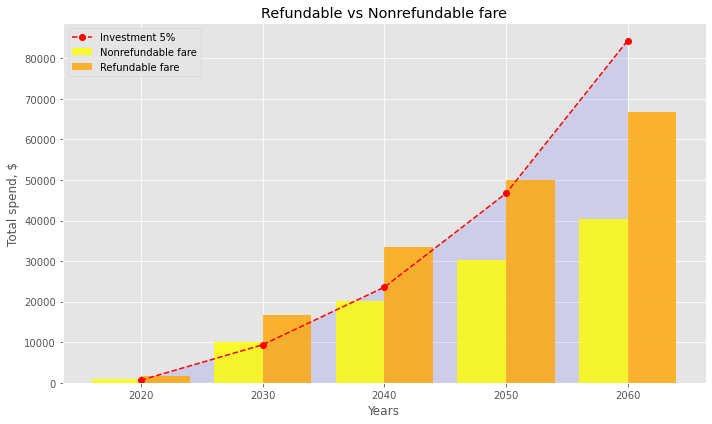

In [14]:
# Visualisation Refundable vs Nonrefundable fare

fig, ax = plt.subplots(figsize=(10,6))

ins_10 = ins[ins.year % 10 == 0]
width = 4   # the width of the bars

nonref = plt.bar(ins_10.year - width/2, ins_10.total_nonref, width, label='Nonrefundable fare', color='yellow', alpha = 0.8)
ref = plt.bar(ins_10.year + width/2, ins_10.total_ref, width, label='Refundable fare', color='orange', alpha = 0.8)

inv5 = plt.plot(ins_10.year, ins_10.end_balance_5pct, label='Investment 5%', color = 'red', alpha = 1, marker = 'o', linestyle = '--')

#### NOT WORKING ####
# plt.fill_between(2020, ins_10.end_balance_5pct)
ax.fill_between(ins_10.year, ins_10.end_balance_5pct, facecolor='blue', alpha=0.1)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Years')
plt.ylabel('Total spend, $')
plt.title('Refundable vs Nonrefundable fare')
plt.legend(loc='upper left')

plt.tight_layout()

plt.savefig(r'files/Ref_vs_nonref.jpg')
plt.show()

In [18]:
ins2060 = ins.loc[ins.year == 2060][['total_nonref', 'total_ref', 'end_balance_5pct']]
ins2060

,total_nonref,total_ref,end_balance_5pct
40,40320,66720,84374


In [28]:
inv_ref = ins2060.end_balance_5pct - ins2060.total_ref
inv_nonref = ins2060.end_balance_5pct - ins2060.total_nonref

print('NET amount you will receive in the end of insurance period for REFUNDABLE fare with 5pct investment is:', int(inv_ref), '\n\nNET amount you will receive in the end of insurance period for NONREFUNDABLE fare with 5pct investment is:', int(inv_nonref))

NET amount you will receive in the end of insurance period for REFUNDABLE fare with 5pct investment is: 17654 

NET amount you will receive in the end of insurance period for NONREFUNDABLE fare with 5pct investment is: 44054
